<a href="https://colab.research.google.com/github/V-kr0pt/Trabalho_Circuitos_II/blob/master/Senoidal/circuito_senoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/V-kr0pt/Trabalho_Circuitos_II/master/Senoidal/tabela_de_entrada%20_senoidal.csv'

circuito = pd.read_csv(url, sep=',')

#retirando colunas desnecessárias para o código
circuito.drop(columns='Tipo_Fonte_de_Tensão', axis=1, inplace=True ) 
#transformando o ramo em índice
circuito.set_index('Ramo', drop=True, inplace=True)
circuito

,nó saída,nó chegada,R(Ohm),L(H),I0(A),C(F),V0(V),Vind(V),Fase_V(rad),Iind(A),Fase_I(rad),W(rad/s)
Ramo,,,,,,,,,,,,
1,1,2,10,0.001,0,0.00000,0,100,0,0,0,500
2,1,2,0,0.000,0,0.00001,0,0,0,0,0,0
3,1,2,10,0.001,0,0.00000,0,0,0,0,0,0


Salvando a frequência na variável "w"

In [ ]:
w = circuito['W(rad/s)'][1]
w

500

## Matriz Incidência (A)

Sabemos que a matriz tem dimensões nxb, aonde n representa a quantidade de nós e b a quantidade de ramos (branches) 

In [ ]:
# - Quantos nós e quantos ramos existem no circuito?

#criando um dataframe que possui somente os nós
nos = circuito[['nó saída', 'nó chegada']]

#sabemos que a quantidade de nós vai ser dada pelo máximo número encontrado na tabela "nos"
quantidade_de_nos = nos.values.max()

#a quantidade de ramos é dada pela quantidade de linhas que possuimos na tabela.
quantidade_de_ramos = circuito.shape[0] 

#a matriz de incidencia completa terá dimensões quantidade_de_nos x quantidade_de_ramos
incidencia_completa = np.zeros((quantidade_de_nos, quantidade_de_ramos)) #matriz de zeros
incidencia_completa


array([[0., 0., 0.],
       [0., 0., 0.]])

Ainda sabemos que como os nossos ramos são grafos orientados, a matriz de incidência terá em uma coluna somente 2 linhas com valores diferente de 0, uma com valor 1 (linha referente ao nó de saída) e outra com valor -1 (linha referente ao nó de chegada)

In [ ]:
#Além disso terá 1 quando a corrente tiver saindo do nó e -1 quando estiver chegando
for ramo in range(quantidade_de_ramos): 
    #contando o nó a partir do zero
    no_de_saida = nos['nó saída'][ramo+1] - 1 # -1 dado que arrays indexa a partir do 0
    no_de_chegada =  nos['nó chegada'][ramo+1] - 1 

    #a matriz tem 1 na linha do nó de saida, coluna do ramo 
    incidencia_completa[no_de_saida,ramo] = 1
#a matriz tem -1 na linha do nó de chegada, coluna do ramo
    incidencia_completa[no_de_chegada, ramo] = -1

incidencia_completa

array([[ 1.,  1.,  1.],
       [-1., -1., -1.]])

Porém, sabemos que a matriz de incidência é linearmente dependente, então não precisamos usar todas as linhas da matriz, podemos alcançar todos os resultados desejados com a matriz de incidência reduzida (retirando a última linha)

In [ ]:
# "A" será a matriz de incidência reduzida. Iremos retirar a última linha da incidencia_completa
A = incidencia_completa[:-1,:]
A

array([[1., 1., 1.]])

In [ ]:
#a transpota da matriz de incidência reduzida:
A.T

array([[1.],
       [1.],
       [1.]])

## Matriz admitância (Yb)

#### Para calcular a matriz de admitância vamos realizar os seguintes passos:
1. Montar uma tabela com as reatâncias resultantes de cada ramo 
2. Aplicar a função inversa e obter as admitâncias resultantes de cada ramo
3. Montar a matriz diagonal "Yb" a partir da tabela construída

In [ ]:
#Temos que a reatância de cada ramo pode ser calculada da seguinte forma:
R = circuito['R(Ohm)']
C = circuito['C(F)']
L = circuito['L(H)']
#No domínio fasorial
Xl = w*L
Xc = 1/(w*C)
Xc.replace(np.inf, 0, inplace=True)

Zeq = R + 1j*(Xl - Xc)

Zeq

Ramo
1     10.000000+0.500000j
2    0.000000-200.000000j
3     10.000000+0.500000j
dtype: complex128

In [ ]:
#Então a admitância:
Yeq = 1/Zeq
Yeq

Ramo
1    0.099751-0.004988j
2   -0.000000+0.005000j
3    0.099751-0.004988j
dtype: complex128

In [ ]:
Yb = np.diag(Yeq)
#apresentando de forma mais legível
print(Yb, sep='\n')

[[ 0.09975062-0.00498753j  0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.        +0.005j       0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.09975062-0.00498753j]]


## Matriz admitância de nós (Yn)

In [ ]:
# A matriz admitância de nós é dada pela seguinte expressão:
# Yn = A*Yb*A.T
Yn = np.dot(A.dot(Yb),A.T)
Yn

array([[0.19950125-0.00497506j]])

## Fontes Independentes  

### Fontes Independentes de Tensão

In [ ]:
#O usuário irá fornecer o fasor das fontes, 
#então iremos primeiro criar uma tabela com a representação cartesiana

#Para fonte de tensão:
modulo_V = circuito['Vind(V)']
fase_V = circuito['Fase_V(rad)']
Vs = modulo_V*(np.cos(fase_V) + 1j*np.sin(fase_V))
Vs

Ramo
1    100.000000+0.000000j
2      0.000000+0.000000j
3      0.000000+0.000000j
dtype: complex128

### Fontes Independentes de Corrente

In [ ]:
#Para fonte de corrente:
modulo_I = circuito['Iind(A)']
fase_I = circuito['Fase_I(rad)']
Js = modulo_I*(np.cos(fase_I) + 1j*np.sin(fase_I))
Js

Ramo
1    0.000000+0.000000j
2    0.000000+0.000000j
3    0.000000+0.000000j
dtype: complex128

### Cálculo de Is

In [ ]:
# A matriz Is é dada pela seguinte expressão:
# Is = A*Yb*Vs - A*Js
Is = np.dot(A.dot(Yb), Vs) - np.dot(A, Js)
Is

array([9.97506234-0.49875312j])

### Cálculo da tensão de nó

In [ ]:
# E = Yn^-1 * Is
Yn_inv = np.linalg.inv(Yn)  
E = Yn_inv.dot(Is)
E 

array([50.03123038-1.25234619j])

### Cálculo de tensão de ramo

In [ ]:
# V = A^T * E
V = np.dot(A.T, E)
V  

array([50.03123038-1.25234619j, 50.03123038-1.25234619j,
       50.03123038-1.25234619j])

### Cálculo de corrente de ramo

In [ ]:
# J = Js + Yb * V - Yb * Vs
J = Js.values + np.dot(Yb,V) - np.dot(Yb, Vs)
J

array([-4.99066204+0.12429848j,  0.00626173+0.25015615j,
        4.98440031-0.37445463j])

## Tabela de Saída

In [ ]:
df_saida = pd.DataFrame(columns=["Tensão de Ramo (V)", "Corrente de Ramo (A)"])

df_saida

,Tensão de Ramo (V),Corrente de Ramo (A)


In [ ]:
df_saida_no = pd.DataFrame(columns=['Tensão de Nó (V)'])
df_saida_no['Tensão de Nó (V)'] = E
df_saida_no

,Tensão de Nó (V)
0,50.031230-1.252346j


In [ ]:
df_saida['Tensão de Ramo (V)'] = V
df_saida['Corrente de Ramo (A)'] = J
df_saida['Tensão de Nó (V)'] = df_saida_no
df_saida.set_index([circuito.index], inplace=True)

df_saida

,Tensão de Ramo (V),Corrente de Ramo (A),Tensão de Nó (V)
Ramo,,,
1,50.031230-1.252346j,-4.990662+0.124298j,50.031230-1.252346j
2,50.031230-1.252346j,0.006262+0.250156j,NaN
3,50.031230-1.252346j,4.984400-0.374455j,NaN


#### Arquivo de saída

In [ ]:
df_saida.to_csv('saida_senoidal.csv')

### Gráfico! 

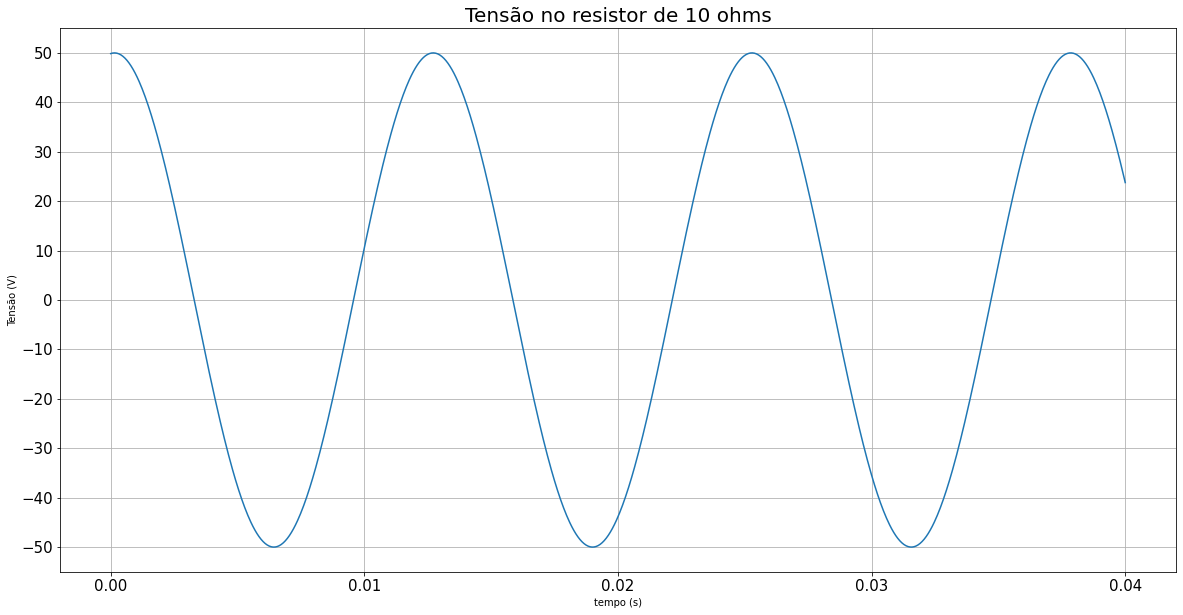

In [ ]:
#definindo o tempo
qtd_de_pontos = 10**3
tmax = 40e-3
t = np.linspace(0,tmax,qtd_de_pontos)

#corrente de ramo fasorial:
corrente_ramo_modulo = np.abs(df_saida['Corrente de Ramo (A)'].values)
corrente_ramo_fase = np.angle(df_saida['Corrente de Ramo (A)'].values)

#corrente no ramo 3 no tempo:
corrente_ramo_3 = corrente_ramo_modulo[2] * np.cos(w*t + corrente_ramo_fase[2])

#tensão no resistor
tensao_no_resistor = 10* corrente_ramo_3 
#plot
plt.figure(figsize=(20,10))
plt.plot(t, tensao_no_resistor)
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
x = [i/100 for i in range(5)]
plt.xticks(x, size=15)
y = [(i-5)*10 for i in range(11)]
plt.yticks( y, size=15)

plt.title('Tensão no resistor de 10 ohms', size=20)
plt.grid(True)


Gráfico das Tensões nos Ramos:


In [ ]:
tensao_ramo_modulo = np.abs(df_saida['Tensão de Ramo (V)'].values)
tensao_ramo_fase = np.angle(df_saida['Tensão de Ramo (V)'].values)

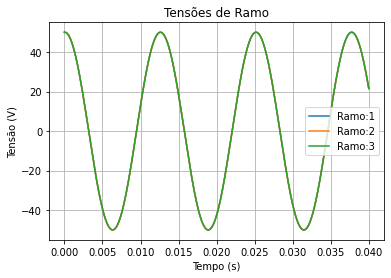

In [ ]:
for ramo in range(quantidade_de_ramos):
  tensao_ramo = tensao_ramo_modulo[ramo] * np.cos(w*t + tensao_ramo_fase[ramo])
  plt.plot(t, tensao_ramo, label = f'Ramo:{ramo+1}')

plt.title ('Tensões de Ramo')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)


Gráfico das Correntes


In [ ]:
corrente_ramo_modulo = np.abs(df_saida['Corrente de Ramo (A)'].values)
corrente_ramo_fase = np.angle(df_saida['Corrente de Ramo (A)'].values)

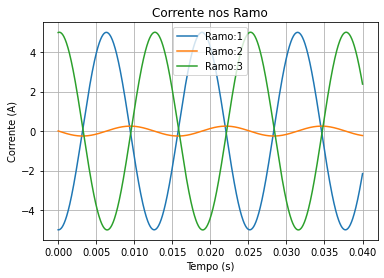

In [ ]:
for ramo in range(quantidade_de_ramos):
  corrente_ramo = corrente_ramo_modulo[ramo] * np.cos(w*t + corrente_ramo_fase[ramo])
  plt.plot(t, corrente_ramo, label = f'Ramo:{ramo+1}')

plt.title ('Corrente nos Ramo')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.grid(True)

In [ ]:
tensao_no_modulo = np.abs(df_saida['Tensão de Nó (V)'].values)
tensao_no_fase = np.angle(df_saida['Tensão de Nó (V)'].values)

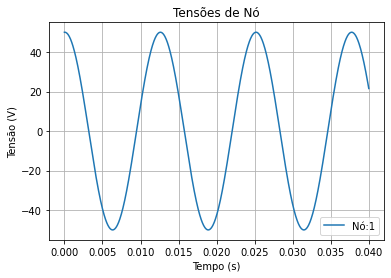

In [ ]:
for nos in range(quantidade_de_nos-1):
   tensao_no = tensao_no_modulo[nos] * np.cos(w*t + tensao_no_fase[nos])
   plt.plot(t, tensao_no, label = f'Nó:{nos+1}')

plt.title ('Tensões de Nó')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)